In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path to the main directory
main_dir = 'E:/PRODIGY_INTERN_PROJECTS/leapGestRecog/leapGestRecog'

# Define the path for the train and test directories
train_dir = 'E:/PRODIGY_INTERN_PROJECTS/leapGestRecog_train'
test_dir = 'E:/PRODIGY_INTERN_PROJECTS/leapGestRecog_test'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each session directory (e.g., '01', '02', etc.)
for session_name in os.listdir(main_dir):
    session_path = os.path.join(main_dir, session_name)
    if os.path.isdir(session_path):
        # Iterate over each gesture directory (e.g., '02_l', '03_p', etc.)
        for class_name in os.listdir(session_path):
            class_path = os.path.join(session_path, class_name)
            if os.path.isdir(class_path):
                images = os.listdir(class_path)
                train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

                # Create class directories in train and test directories
                os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
                os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

                # Move the train images
                for image in train_images:
                    src = os.path.join(class_path, image)
                    dest = os.path.join(train_dir, class_name, image)
                    shutil.move(src, dest)

                # Move the test images
                for image in test_images:
                    src = os.path.join(class_path, image)
                    dest = os.path.join(test_dir, class_name, image)
                    shutil.move(src, dest)


In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')


In [8]:
# Directories for training and testing
train_dir = 'E:/PRODIGY_INTERN_PROJECTS/leapGestRecog_train'
test_dir = 'E:/PRODIGY_INTERN_PROJECTS/leapGestRecog_test'


In [9]:
# Data Augmentation and Preprocessing
# Image data generator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [11]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
tf.keras.backend.clear_session()

In [13]:
# Train the model

# history = model.fit(
#    train_generator,
#    steps_per_epoch=train_generator.samples // train_generator.batch_size,
#    epochs=10,
#    validation_data=test_generator,
#    validation_steps=test_generator.samples // test_generator.batch_size
# )



train_accuracy_history = []
val_accuracy_history = []
train_loss_history = []
val_loss_history = []

for epoch in range(10):  # Custom training loop
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        validation_data=test_generator,
        validation_steps=len(test_generator)
    )
    
    # Append accuracy and loss to history lists
    train_accuracy_history.append(history.history['accuracy'][0])
    val_accuracy_history.append(history.history['val_accuracy'][0])
    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])


500/500 ━━━━━━━━━━━━━━━━━━━━ 418s 814ms/step - accuracy: 0.3478 - loss: 1.7683 - val_accuracy: 0.9585 - val_loss: 0.1988
500/500 ━━━━━━━━━━━━━━━━━━━━ 124s 245ms/step - accuracy: 0.8360 - loss: 0.4845 - val_accuracy: 0.9795 - val_loss: 0.0773
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 274ms/step - accuracy: 0.9085 - loss: 0.2824 - val_accuracy: 0.9885 - val_loss: 0.0466
500/500 ━━━━━━━━━━━━━━━━━━━━ 126s 249ms/step - accuracy: 0.9342 - loss: 0.2085 - val_accuracy: 0.9898 - val_loss: 0.0473
500/500 ━━━━━━━━━━━━━━━━━━━━ 126s 248ms/step - accuracy: 0.9459 - loss: 0.1756 - val_accuracy: 0.9985 - val_loss: 0.0098
500/500 ━━━━━━━━━━━━━━━━━━━━ 130s 257ms/step - accuracy: 0.9553 - loss: 0.1435 - val_accuracy: 0.9898 - val_loss: 0.0393
500/500 ━━━━━━━━━━━━━━━━━━━━ 122s 240ms/step - accuracy: 0.9604 - loss: 0.1271 - val_accuracy: 0.9655 - val_loss: 0.0929
500/500 ━━━━━━━━━━━━━━━━━━━━ 126s 250ms/step - accuracy: 0.9713 - loss: 0.0994 - val_accuracy: 0.9965 - val_loss: 0.0118
500/500 ━━━━━━━━━━━━━━━━━━━━ 121

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.9989 - loss: 0.0049
Test Accuracy: 99.90%


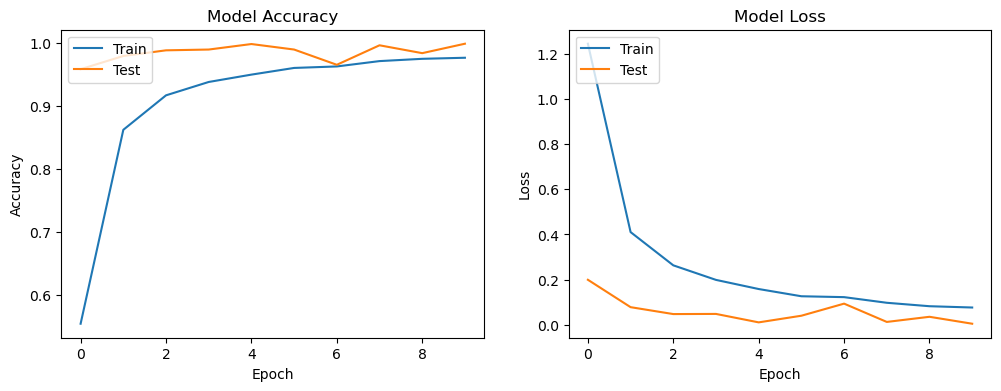

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_history)
plt.plot(val_accuracy_history)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


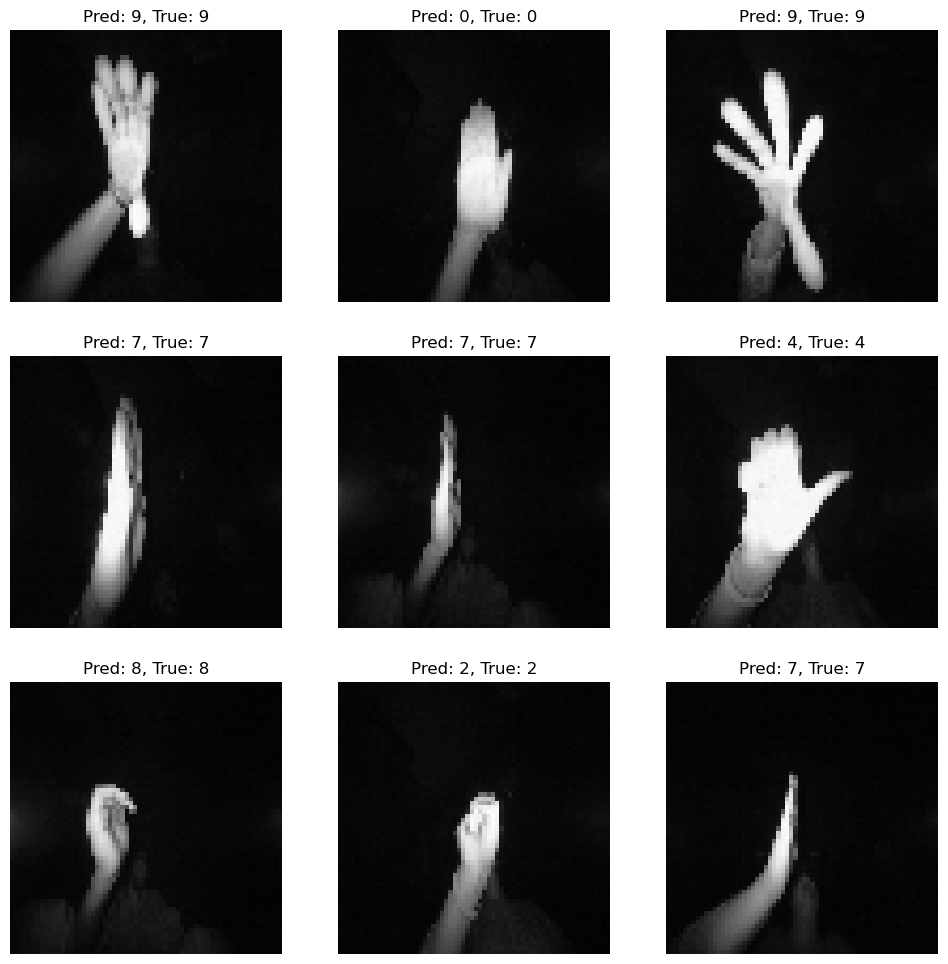

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the test set
images, labels = next(test_generator)

# Predict on these images
predictions = model.predict(images)

# Convert predictions and labels to readable format
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

# Plot images along with predicted and true labels
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f'Pred: {predicted_labels[i]}, True: {true_labels[i]}')
    plt.axis('off')
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 89s 713ms/step


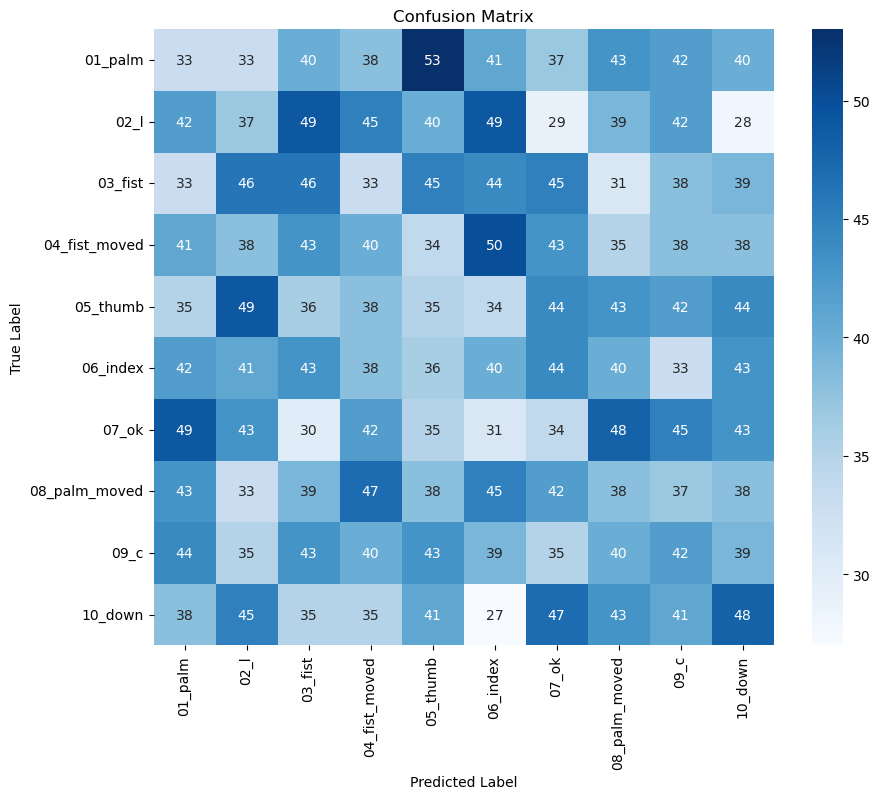

In [28]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from the model
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
